# Simple Model Training with Darts Library

In [1]:
#work with darts library to create a time series forecast
import darts
import pandas as pd
import wapi
from darts.models.forecasting.rnn_model import RNNModel
from darts import TimeSeries



c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
def assemble_dataframe(time_start, time_end, config_file_path='../apiconfig.ini'):
    curve_names = [
        "pro ch spv mwh/h cet min15 a",
        "pro ch spv mwh/h cet min15 n",
        "pro it spv mwh/h cet min15 a",
        "pro fr spv mwh/h cet min15 a",
        "pro de spv mwh/h cet min15 a",
        "pro at spv mwh/h cet min15 a",
        "cap ch spv mw cet min15 a",
        "tt ch grimsel test °c cet h s",
        "tt ch adelboden test °c cet h s",
        "tt ch geneve test °c cet h s",
        "tt ch davos test °c cet h s",
        "tt ch engelberg test °c cet h s",
        "tt ch bern test °c cet h s",
        "tt ch lugano test °c cet h s",
        "tt ch zurich test °c cet h s",
        "tt ch samedan test °c cet h s",
        "cc ch con ec00 % cet min15 f",
        "cc ch grimsel test % cet h s",
        "cc ch adelboden test % cet h s",
        "cc ch geneve test % cet h s",
        "cc ch davos test % cet h s",
        "cc ch engelberg test % cet h s",
        "cc ch bern test % cet h s",
        "cc ch lugano test % cet h s",
        "cc ch zurich test % cet h s",
        "cc ch samedan test % cet h s",
    ]
    session = wapi.Session(config_file=config_file_path)
    ch_total_prod_curve = session.get_curve(name=curve_names[0])
    ts = ch_total_prod_curve.get_data(data_from= time_start, data_to=time_end, frequency='h', function ="AVERAGE")
    return ts.to_pandas()

In [21]:
data = assemble_dataframe('2012-01-01', '2022-12-05')


c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\wapi\util.py:135: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return res.asfreq(self._map_freq(self.frequency))


0

In [168]:
pd_dataframe = pd.DataFrame({'timestamp':data.index, 'value':data.values})
pd_dataframe['timestamp'] = pd.to_datetime(pd_dataframe.timestamp).dt.tz_localize(None)


freq = pd.infer_freq(pd_dataframe['timestamp'])

#find the gaps in the timestep data column where the frequency is not hourly
pd_dataframe['time_diff'] = pd_dataframe['timestamp'].diff()
indexes_not_hourly = pd_dataframe[pd_dataframe["time_diff"] != pd.Timedelta('0 days 01:00:00')]
indexes = indexes_not_hourly.index.tolist()


for i in range(len(indexes)-1):
    index = indexes[i]
    end_index = indexes [i+1] if i+1 < len(indexes) else len(pd_dataframe)


    if pd_dataframe.loc[index]["timestamp"].month == 3:
        print(pd_dataframe.loc[index-1:index+1])
        print(pd_dataframe.loc[end_index-1:end_index+1])

        #shift from start_index to end_index the datetime by 1 hour and delete the where the time_diff is 0 days 00:00:00
        pd_dataframe.loc[index:end_index, 'timestamp'] = pd_dataframe.loc[index:end_index, 'timestamp'] - pd.Timedelta('1 hours')


               timestamp  value       time_diff
2017 2012-03-25 01:00:00    0.0 0 days 01:00:00
2018 2012-03-25 03:00:00    0.0 0 days 02:00:00
2019 2012-03-25 04:00:00    0.0 0 days 01:00:00
               timestamp  value       time_diff
7225 2012-10-28 02:00:00    0.0 0 days 01:00:00
7226 2012-10-28 02:00:00    0.0 0 days 00:00:00
7227 2012-10-28 03:00:00    0.0 0 days 01:00:00
                timestamp  value       time_diff
10921 2013-03-31 01:00:00    0.0 0 days 01:00:00
10922 2013-03-31 03:00:00    0.0 0 days 02:00:00
10923 2013-03-31 04:00:00    0.0 0 days 01:00:00
                timestamp  value       time_diff
15961 2013-10-27 02:00:00    0.0 0 days 01:00:00
15962 2013-10-27 02:00:00    0.0 0 days 00:00:00
15963 2013-10-27 03:00:00    0.0 0 days 01:00:00
                timestamp  value       time_diff
19657 2014-03-30 01:00:00    0.0 0 days 01:00:00
19658 2014-03-30 03:00:00    0.0 0 days 02:00:00
19659 2014-03-30 04:00:00    0.0 0 days 01:00:00
                timestamp  v

In [149]:
indexes_not_hourly

,timestamp,value,time_diff
0,2012-01-01 00:00:00,0.000000,NaT
2018,2012-03-25 03:00:00,0.000000,0 days 02:00:00
7226,2012-10-28 02:00:00,0.000000,0 days 00:00:00
10922,2013-03-31 03:00:00,0.000000,0 days 02:00:00
15962,2013-10-27 02:00:00,0.000000,0 days 00:00:00
19658,2014-03-30 03:00:00,0.000000,0 days 02:00:00
24698,2014-10-26 02:00:00,0.000000,0 days 00:00:00
28394,2015-03-29 03:00:00,0.000000,0 days 02:00:00
33434,2015-10-25 02:00:00,0.000000,0 days 00:00:00
37130,2016-03-27 03:00:00,0.000000,0 days 02:00:00


In [137]:
pd_dataframe[pd_dataframe["time_diff"] != pd.Timedelta('0 days 01:00:00')]

,timestamp,value,time_diff
0,2012-01-01 00:00:00,0.000000,NaT
2018,2012-03-25 02:00:00,0.000000,0 days 02:00:00
7226,2012-10-28 01:00:00,0.000000,0 days 00:00:00
10922,2013-03-31 02:00:00,0.000000,0 days 02:00:00
15962,2013-10-27 01:00:00,0.000000,0 days 00:00:00
19658,2014-03-30 02:00:00,0.000000,0 days 02:00:00
24698,2014-10-26 01:00:00,0.000000,0 days 00:00:00
28394,2015-03-29 02:00:00,0.000000,0 days 02:00:00
33434,2015-10-25 01:00:00,0.000000,0 days 00:00:00
37130,2016-03-27 02:00:00,0.000000,0 days 02:00:00


In [117]:
series = TimeSeries.from_dataframe(pd_dataframe, "timestamp", "value", fill_missing_dates=True, freq='H')

c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\darts\timeseries.py:4736: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_time_index = resampled_time_index.asfreq(freq)


ValueError: cannot reindex on an axis with duplicate labels

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 265 K 
4 | V             | Linear           | 257   
---------------------------------------------------
265 K     Trainable params
0         Non-trainable params
265 K     Total params
1.062     Total estimated model params size (MB)


Epoch 33:  39%|███▉      | 7/18 [00:01<00:02,  4.19it/s, train_loss=2.27e+5] 

c:\Users\thoma\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00,  6.70it/s]


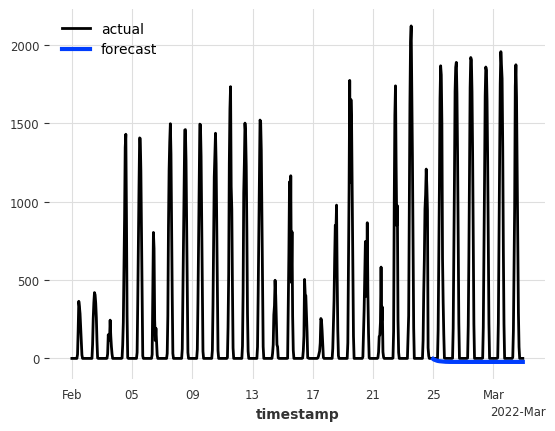

In [28]:
#select the training and validation 20% is validation and last points
train, val = series.split_after(0.8)

#types = ["LSTM", "GRU", "RNN"] available models
choosen_model = "LSTM"
chunk_length = 24
hidden_dim = 256
n_epochs = 100

#rnn model 
model = RNNModel(model=choosen_model,input_chunk_length= chunk_length, hidden_dim = 256 ,n_rnn_layers=1, n_epochs=n_epochs, random_state=0) 

#fit the model


model.fit(train)
prediction = model.predict(len(val))


import matplotlib.pyplot as plt
series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()



In [ ]:
train